In [15]:
from utils.iterative_greedy_algorithm import IG
from utils.visualization_animation import louvain_animation
from utils.communities_network import  calc_nmi, communities_to_labels
from utils.utils import read_community_labels_file_reel ,read_community_labels_file_synth , save_predicted_labels

import networkx as nx
import matplotlib.pyplot as plt

# Tests

In [16]:
animation_output_path = r"./output/animations"
saved_labels_output_path = r"./output/predicted_labels"

## 1.Reel

### 1.1 Dophins

In [37]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [56]:
communities , modularity_trace , communities_trace , animation_frames = IG(adj_matrix, 20, beta=.5)


print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_reel("data/reel/dolphins/groundTruth.txt")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/dolphins")

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG done in 6 iterations
Founds 5 communities
NMI: 0.3160523589615766
Predicted labels saved to ./output/predicted_labels/dolphins.txt


Text(0.5, 1.0, 'Modularity and NMI trace (dophins)')

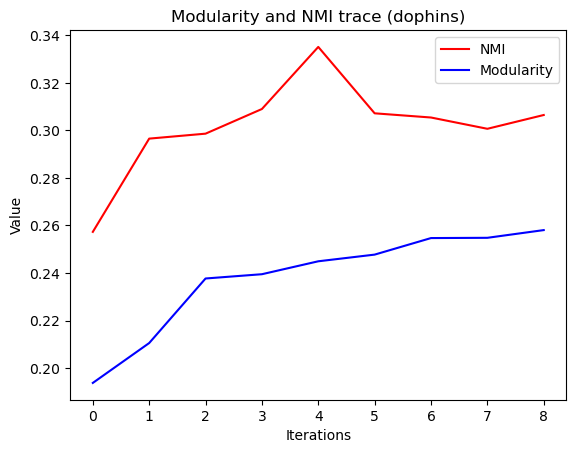

In [19]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (dophins)")

plt.show()

The animation GIF is saved in ./output/animations/dophins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


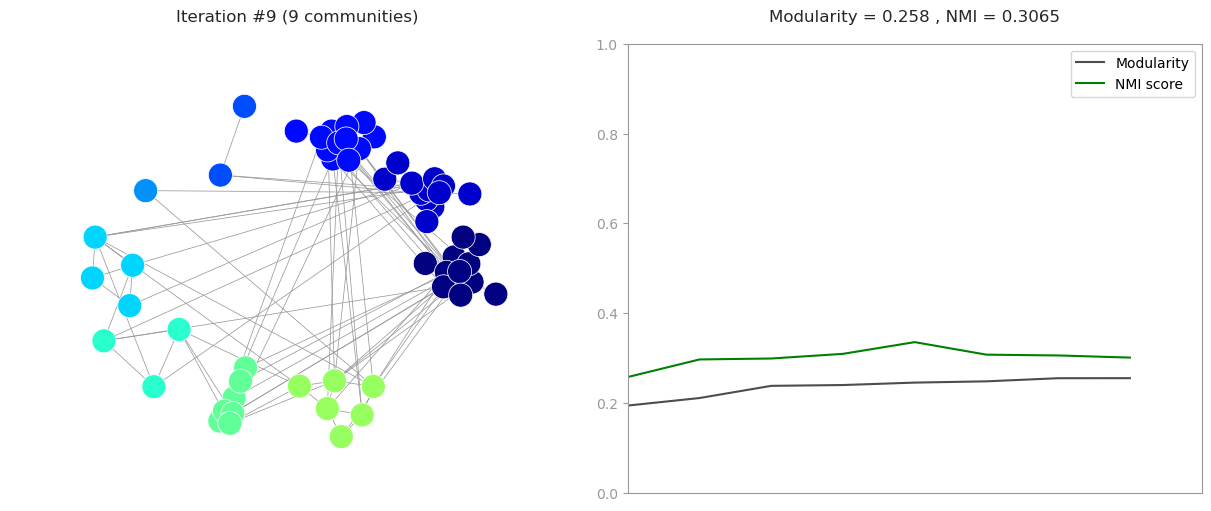

In [20]:
anim = louvain_animation(adj_matrix, animation_frames , nmi_trace, dark=False,
                  duration=60, filename=f"{animation_output_path}/dophins.gif", dpi=200)

### 1.2 Karate dataset

In [21]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path,  label='id')
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

34

In [22]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 10, beta=.5)


print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_reel(
    "data/reel/karate/groundTruth.txt")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/karate")

IG:   0%|          | 0/10 [00:00<?, ?it/s]

IG done in 7 iterations
Founds 5 communities
NMI: 0.555529751234653
Predicted labels saved to ./output/predicted_labels/karate.txt


Text(0.5, 1.0, 'Modularity and NMI trace (karate)')

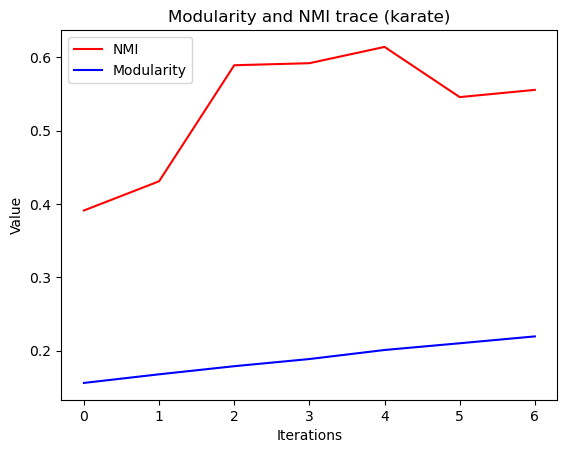

In [23]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (karate)")

plt.show()

The animation GIF is saved in ./output/animations/karate.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


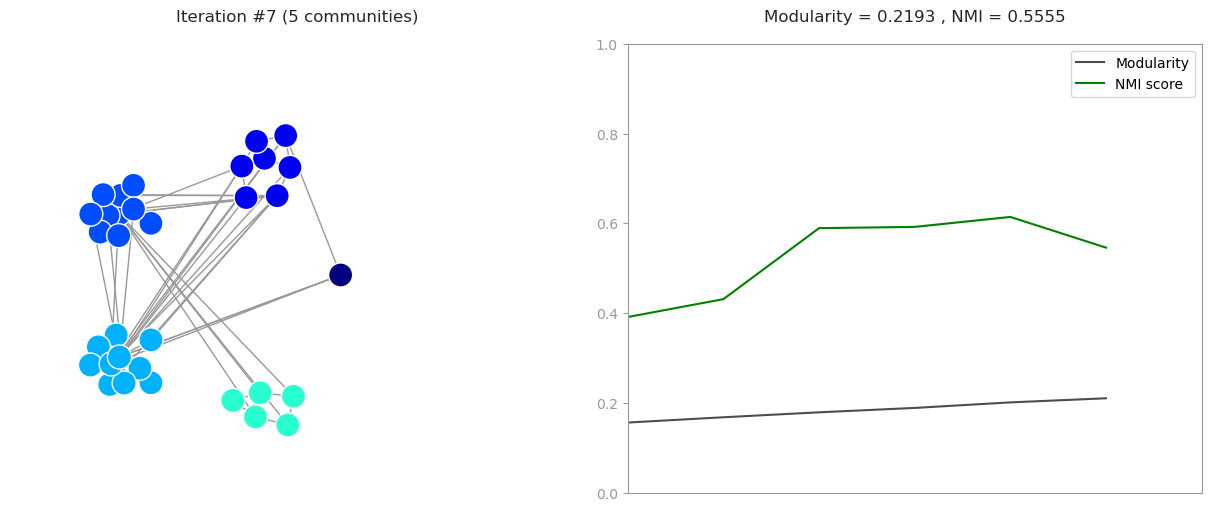

In [24]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/karate.gif", dpi=200)

## 2.Synthetic Datastes

### 2.1 LRF 0.15

In [25]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [26]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 20, beta=.5)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.15")

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG done in 8 iterations
Founds 4 communities
NMI: 1.0
Predicted labels saved to ./output/predicted_labels/LRF_0.15.txt


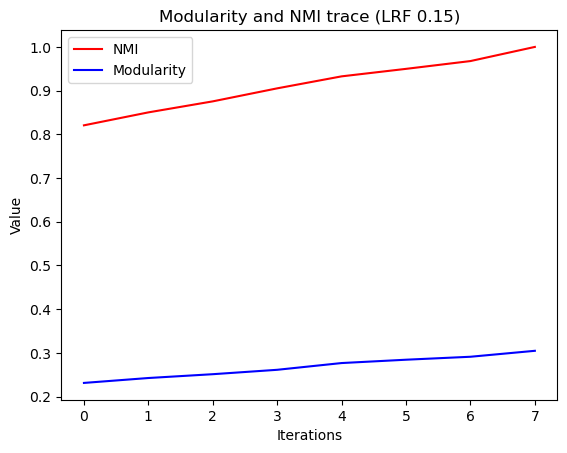

In [27]:
plt.plot(nmi_trace , label="NMI" , color="red")
plt.plot(modularity_trace , label="Modularity" , color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.15)")

plt.show()

The animation GIF is saved in ./output/animations/LRF15.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


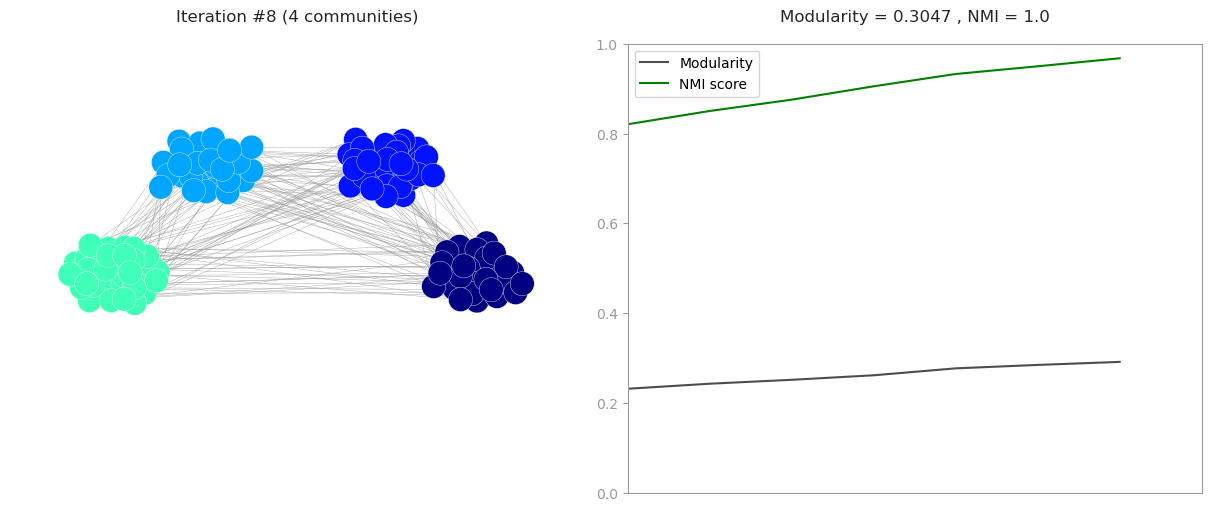

In [28]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF15.gif", dpi=200)

### 2.2 LRF 0.40

In [29]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [30]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 15, beta=.5)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.40")

IG:   0%|          | 0/15 [00:00<?, ?it/s]

IG done in 12 iterations
Founds 4 communities
NMI: 0.9574713022892701
Predicted labels saved to ./output/predicted_labels/LRF_0.40.txt


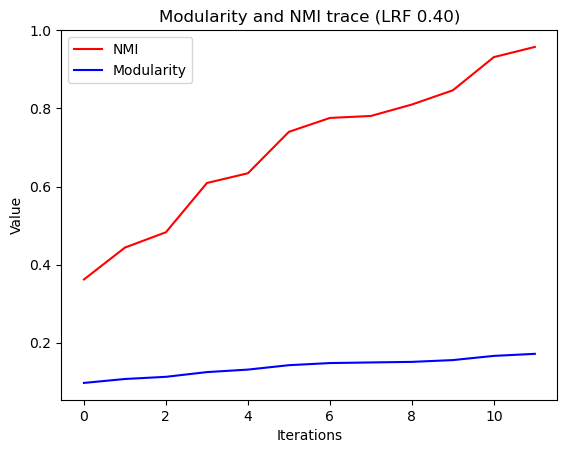

In [31]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.40)")
plt.show()

The animation GIF is saved in ./output/animations/LRF40.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


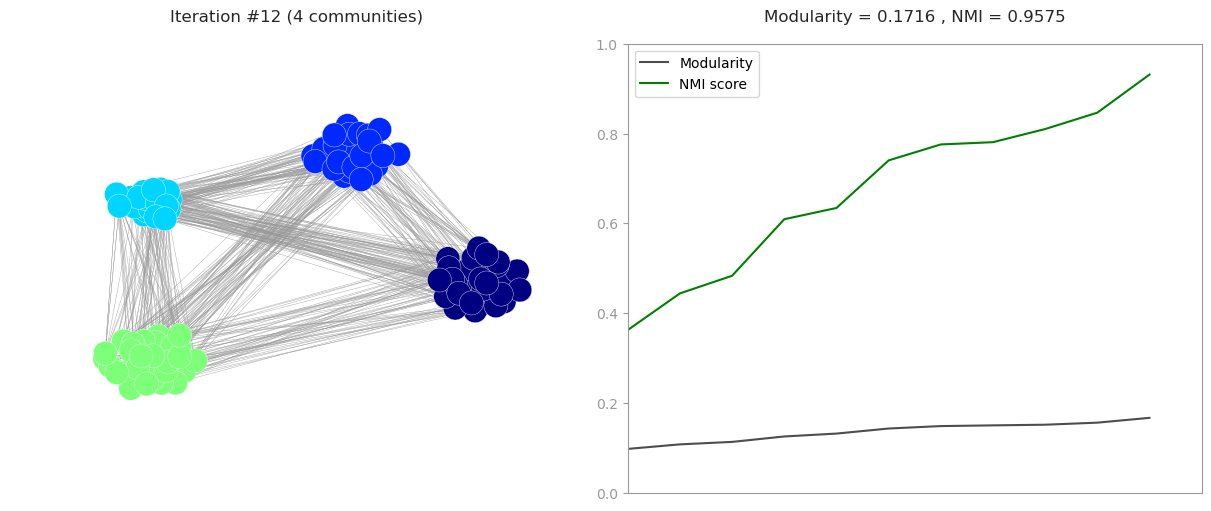

In [32]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF40.gif", dpi=200)

### LRF 0.50

In [58]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [61]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 20, beta=.5)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.50")

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG done in 3 iterations
Founds 6 communities
NMI: 0.15299252589316029
Predicted labels saved to ./output/predicted_labels/karate.txt


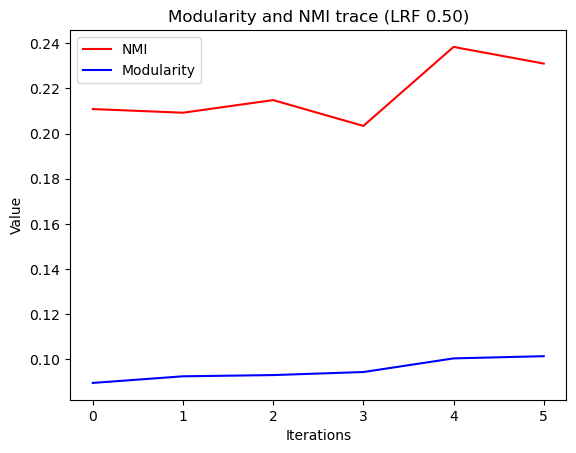

In [60]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.50)")

plt.show()

The animation GIF is saved in ./output/animations/LRF50.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


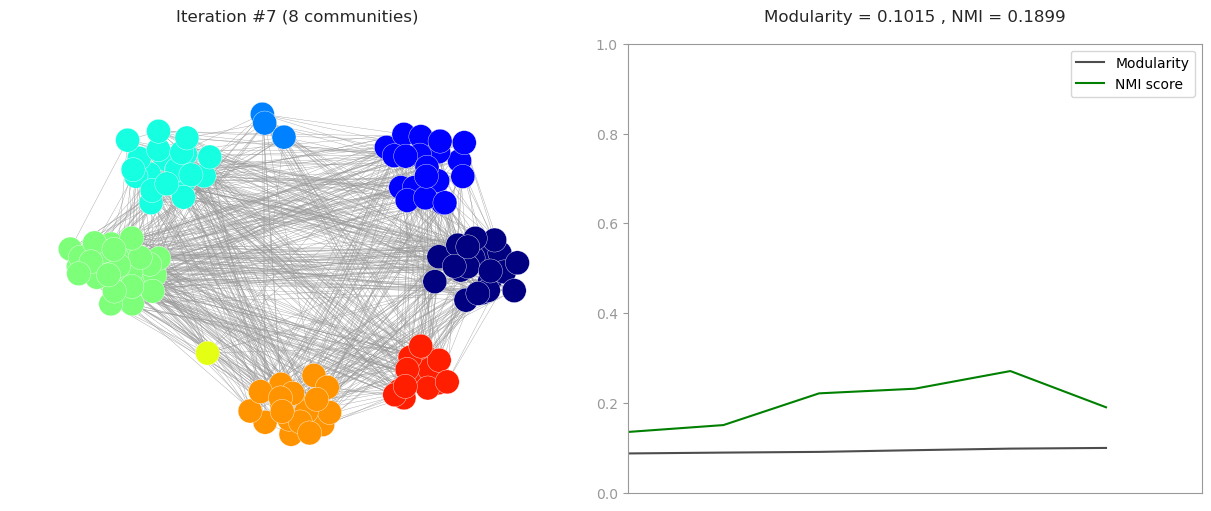

In [36]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF50.gif", dpi=200)